In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Step-1 : Importing the Data

In [3]:
Sales = pd.read_excel("SALESDATA.xls")
Sales.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,237.91,0.00,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,456.17,824.96,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,438.93,548.66,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,...,211.75,0.00,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons


### Step-2: Data Inspection

In [4]:
Sales.shape

(65282, 22)

In [5]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

Notes:
- Here we can see that the data types are correctly matched
- Column #20 & #21 donot seem to be of any significance & hence need to remove these two columns

In [6]:
Sales.describe(percentiles=[0.25,0.50,0.75,0.90,0.99])

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Unnamed: 20
count,6.528200e+04,65280.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65281.000000,65282.000000,65282.000000,0.0
mean,1.001770e+07,1855.574835,216223.662020,23713.849790,514.693380,180583.064352,2852.038373,4707.473613,1660.979228,1191.059145,283.615913,45.084311,137.422398,NaN
std,7.176148e+03,9037.140888,94992.281866,32664.024053,449.189182,67593.871116,15164.342107,20696.443785,9556.485250,5860.787502,252.876719,429.661793,26.643936,NaN
min,1.000045e+07,-255820.800000,100012.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,-5000.000000,-1.000000,103.000000,NaN
25%,1.001272e+07,246.037500,117931.000000,3000.000000,181.560000,115321.000000,308.387500,561.040000,167.790000,129.950000,100.070000,2.000000,113.000000,NaN
50%,1.001966e+07,441.760000,222869.500000,12000.000000,325.190000,203702.000000,553.940000,998.160000,304.500000,246.490000,183.757500,3.000000,134.000000,NaN
75%,1.002351e+07,999.760000,314318.750000,32000.000000,803.860000,218576.000000,1280.042500,2315.040000,687.320000,579.530000,448.220000,8.000000,160.000000,NaN
90%,1.002558e+07,2876.846000,325700.000000,59000.000000,1254.189900,316241.900000,3817.780000,6765.080000,2178.099000,1629.221000,670.176667,30.000000,180.000000,NaN
99%,1.002712e+07,27746.820000,332153.520000,167000.000000,1627.840000,320895.000000,47499.380000,76903.360000,24789.580000,19376.000000,917.476833,700.000000,184.000000,NaN
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000,NaN


Note:
Looking at the data , the 99th percentile and the maximum value varies widely, indicating that there might be outliers in the data.

### Checking for Null values

In [7]:
Sales.isnull().sum()

CustKey                                 0
DateKey                                 0
Discount Amount                         2
Invoice Date                            0
Invoice Number                          0
Item Class                           8289
Item Number                            41
Item                                    0
Line Number                             0
List Price                              0
Order Number                            0
Promised Delivery Date                  0
Sales Amount                            0
Sales Amount Based on List Price        0
Sales Cost Amount                       0
Sales Margin Amount                     0
Sales Price                             1
Sales Quantity                          0
Sales Rep                               0
U/M                                     0
Unnamed: 20                         65282
Unnamed: 21                         65278
dtype: int64

Note:
- The data is missing for the columns - `Discount Amount`,`Item Class`,`Item Number`
- We are not considering the columns `Unnamed: 20` , `Unnamed 21` as they are non significant here

### Step-3: Data Cleaning

#### Removing irrelevant columns

In [8]:
Sales.drop(['Unnamed: 20'],axis=1,inplace=True)

In [9]:
Sales.drop(['Unnamed: 21'],axis=1,inplace=True)

In [10]:
Sales.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,2017-04-30,237.91,0.00,0.0,237.91,237.910000,1,184,EA
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,2017-07-14,456.17,824.96,0.0,456.17,456.170000,1,127,EA
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,2017-10-16,438.93,548.66,0.0,438.93,438.930000,1,127,EA
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,2017-06-03,211.75,0.00,0.0,211.75,211.750000,1,160,EA
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,2017-05-28,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE


#### Dealing with the missing values

In [11]:
round(100*(Sales.isnull().sum()/len(Sales)), 2).sort_values(ascending=False)

Item Class                          12.70
Item Number                          0.06
CustKey                              0.00
Promised Delivery Date               0.00
Sales Rep                            0.00
Sales Quantity                       0.00
Sales Price                          0.00
Sales Margin Amount                  0.00
Sales Cost Amount                    0.00
Sales Amount Based on List Price     0.00
Sales Amount                         0.00
Order Number                         0.00
DateKey                              0.00
List Price                           0.00
Line Number                          0.00
Item                                 0.00
Invoice Number                       0.00
Invoice Date                         0.00
Discount Amount                      0.00
U/M                                  0.00
dtype: float64

In [12]:
# Since, only 12% of the records have missing values, hence dropping them

Sales.dropna(axis=0,inplace=True)

In [13]:
Sales.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
1,10002220,2017-07-14,368.790,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.960,200245,2017-07-14,456.17,824.960,0.0,456.17,456.170000,1,127,EA
2,10002220,2017-10-17,109.730,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.660,213157,2017-10-16,438.93,548.660,0.0,438.93,438.930000,1,127,EA
4,10004516,2017-05-27,96627.940,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.520,203785,2017-05-28,89248.66,185876.600,0.0,89248.66,196.150901,455,124,SE
6,10007866,2017-09-03,371.014,2017-09-03,100403,P01,20910,Moms Sliced Turkey,2000,795.314,200436,2017-09-03,424.30,795.314,0.0,424.30,424.300000,1,149,EA
7,10009356,2017-06-18,608.080,2017-06-18,105481,P01,62550,Tell Tale Garlic,29000,575.000,205213,2017-06-18,541.92,1150.000,0.0,541.92,270.960000,2,103,EA


In [14]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56993 entries, 1 to 65281
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           56993 non-null  int64         
 1   DateKey                           56993 non-null  datetime64[ns]
 2   Discount Amount                   56993 non-null  float64       
 3   Invoice Date                      56993 non-null  datetime64[ns]
 4   Invoice Number                    56993 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       56993 non-null  object        
 7   Item                              56993 non-null  object        
 8   Line Number                       56993 non-null  int64         
 9   List Price                        56993 non-null  float64       
 10  Order Number                      56993 non-nu

### Outlier Handling

In [15]:
Sales.describe(percentiles=[0.25,0.50,0.75,0.90,0.99])

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
count,5.699300e+04,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000,56993.00000
mean,1.001758e+07,1526.396318,216407.511537,24588.751777,536.262010,180463.928675,1655.777031,3182.173348,925.933614,729.843417,290.313444,9.841472,136.69312
std,7.231012e+03,5327.696464,95002.543962,32477.174741,446.072796,67594.415280,5309.497134,10546.977037,3169.623938,2328.875603,244.347560,34.132815,26.47562
min,1.000045e+07,-15030.790000,100034.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-717.590000,1.282816,1.000000,103.00000
25%,1.001242e+07,255.950000,117962.000000,4000.000000,190.850000,115223.000000,301.460000,561.040000,162.890000,128.520000,102.403333,2.000000,113.00000
50%,1.001940e+07,455.900000,222954.000000,13000.000000,378.290000,203670.000000,533.640000,983.440000,295.240000,237.940000,202.910000,3.000000,130.00000
75%,1.002351e+07,1006.424400,314275.000000,33000.000000,824.962500,218640.000000,1170.680000,2169.220000,626.900000,524.720000,463.920000,6.000000,160.00000
90%,1.002556e+07,2708.700000,325798.000000,60000.000000,1254.189900,316374.000000,3029.970000,5724.920000,1681.530000,1339.920000,669.825000,20.000000,180.00000
99%,1.002712e+07,19324.724800,332166.240000,166000.000000,1627.840000,320901.000000,20362.505200,39756.945000,10756.950000,9454.830000,909.510000,120.000000,184.00000
max,1.002758e+07,191196.553200,332842.000000,330000.000000,1975.000000,321532.000000,215364.600000,391924.723200,118903.530000,96461.070000,1474.170000,1000.000000,185.00000


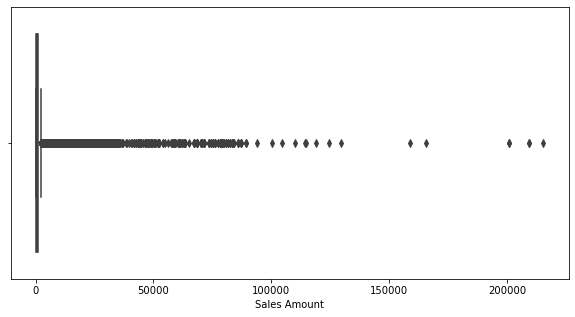

In [16]:
#checking for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(Sales['Sales Amount'])
plt.show()

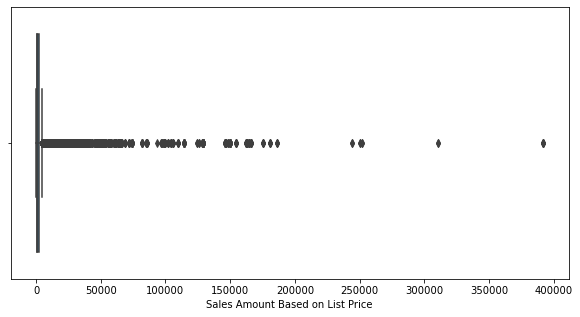

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(Sales['Sales Amount Based on List Price'])
plt.show()

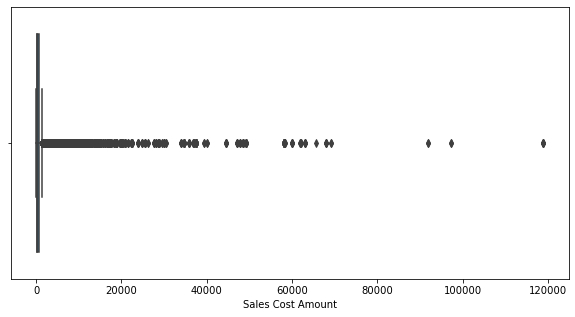

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(Sales['Sales Cost Amount'])
plt.show()

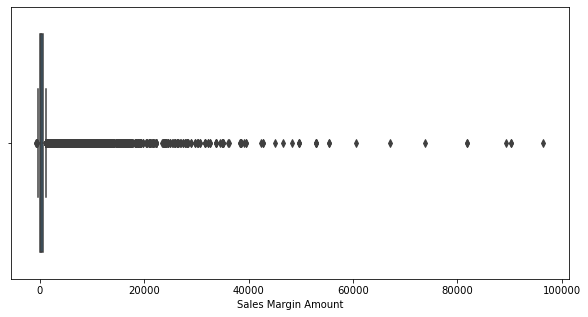

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(Sales['Sales Margin Amount'])
plt.show()

Based on prior domain knowledge, it is better to keep the outliers , however, in order to treat them, the binning method will be used. The binning will be done as a calculated field in Tableau. 

### Please Note:

The EDA and the entire analysis has been done using Tableau. Please refer to the Tableau file for the next steps.

### Extracting the excel file

In [22]:
Sales.to_excel("Sales_Cleaned.xls")